<div align="right" style="font-size: 500%; font-weight: bold; margin-top: 80px; margin-right: 80px; color: black;">
    2
</div>

<div align="right" style="font-size: 300%; font-weight: bold; margin-right: 80px; color: black;">
    Pythonic Code
</div>



In this chapter, we will explore the way ideas are expressed in Python, with its own peculiarities. If you are familiar with the standard ways of accomplishing some tasks in programming (such as getting the last element of a list, iterating, and searching), or if you come from other programming languages (such as C, C++, and Java), then you will find that, in general, Python provides its own mechanism for most common tasks.

In programming, an idiom is a particular way of writing code in order to perform a specific task. It is something common that repeats and follows the same structure every time. Some could even argue and call them a pattern, but be careful because they are not designed patterns (which we will explore later on). The main difference is that design patterns are high-level ideas, independent from the language (sort of), but they do not translate into code immediately. On the other hand, idioms are actually coded. It is the way things should be written when we want to perform a particular task.

As idioms are code, they are language dependent. Every language will have its idioms, which means the way things are done in that particular language (for example, how you would open and write a file in C, or C++). When the code follows these idioms, it is known as being idiomatic, which in Python is often referred to as Pythonic.

There are multiple reasons to follow these recommendations and write Pythonic code first (as we will see and analyze), since writing code in an idiomatic way usually performs better. It is also more compact and easier to understand. These are traits that we always want in our code so that it works effectively.

The goals of this chapter are as follows:

- To understand indices and slices, and correctly implement objects that can be indexed
- To implement sequences and other iterables
- To learn about good use cases for context managers, and how to write effective ones
- To implement more idiomatic code through magic methods
- To avoid common mistakes in Python that lead to undesired side effects

We start by exploring the first item on the list (indexes and slices) in the next section.


Secondly, as introduced in the previous chapter, it is important that the entire development team can get used to the same patterns and structure of the code because this will help them focus on the true essence of the problem, and will help them avoid making mistakes.

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    Indexes and slices
</div>

In Python, as in other languages, some data structures or types support accessing its elements by index. Another thing it has in common with most programming languages is that the first element is placed in the index number <code>0</code>. However, unlike those languages, when we want to access the elements in a different order than usual, Python provides extra features.

For example, how would you access the last element of an array in C? This is something I did the first time I tried Python. Thinking the same way as in C, I would get the element in the position of the length of the array minus one. In Python, this would work too, but we could also use a negative index number, which will start counting from the last element, as shown in the following commands:

In [1]:
my_numbers = (4, 5, 3, 9)
my_numbers[-1]

9

In [2]:
my_numbers[-3]

5

This is an example of the preferred (Pythonic) way of doing things.

In addition to getting just one element, we can obtain many by using <code>slice</code>, as shown in the following commands:

In [3]:
my_numbers = (1, 1, 2, 3, 5, 8, 13, 21)

my_numbers[2:5]


(2, 3, 5)

In this case, the syntax on the square brackets means that we get all of the elements on the tuple, starting from the index of the first number (inclusive), up to the index on the second one (not including it). Slices work this way in Python by excluding the end of the selected interval.

You can exclude either one of the intervals, start or stop, and in that case, it will act from the beginning or end of the sequence, respectively, as shown in the following commands:

In [4]:
my_numbers[:3]

(1, 1, 2)

In [5]:
my_numbers[3:]

(3, 5, 8, 13, 21)

In [6]:
my_numbers[::]  # also my_numbers[:], returns a copy

(1, 1, 2, 3, 5, 8, 13, 21)

In [7]:
my_numbers[1:7:2]

(1, 3, 8)

In the first example, it will get everything up to the index in the position number `3`. In the second example, it will get all the numbers from the position `3` (inclusive), up to the end. In the second to last example, where both ends are excluded, it is actually creating a copy of the original tuple.

The last example includes a third parameter, which is the step. This indicates how many elements to jump when iterating over the interval. In this case, it would mean getting the elements between the positions one and seven, jumping by two.

In all of these cases, when we pass intervals to a sequence, what is actually happening is that we are passing `slice`. Note that `slice` is a built-in object in Python that you can build yourself and pass directly:

In [8]:
interval = slice(1, 7, 2)
my_numbers[interval]

(1, 3, 8)

In [9]:
interval = slice(None, 3)
my_numbers[interval] == my_numbers[:3]

True

Notice that when one of the elements is missing (start, stop, or step), it is considered to be `None`.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> You should always prefer to use this built-in syntax for slices, as opposed to manually trying to iterate the tuple, string, or list inside a <code>for</code> loop, excluding the elements by hand.
    </div>
</div>


<div style="font-size: 200%; font-weight: bold; margin-top: 30px; color: black;">
    Creating your own sequences
</div>

The functionality we just discussed works, thanks to a magic method (magic methods are those surrounded by double underscores that Python uses to reserve special behavior) called `__getitem__`. This is the method that is called when something like <code>myobject[key]</code> is called, passing the `key` (value inside the square brackets) as a parameter. A sequence, in particular, is an object that implements both `__getitem__` and `__len__`, and for this reason, it can be iterated over. Lists, tuples, and strings are examples of sequence objects in the standard library.

In this section, we care more about getting particular elements from an object by a key than building sequences or iterable objects, which is a topic explored in <i style="font-family: 'Times New Roman'; font-size: 16px;"> Chapter 7, Generators, Iterators, and Asynchronous Programming. </i>

If you are going to implement `__getitem__` in a custom class in your domain, you will have to take into account some considerations in order to follow a Pythonic approach.

In the case that your class is a wrapper around a standard library object, you might as well delegate the behavior as much as possible to the underlying object. This means that if your class is actually a wrapper on the list, call all of the same methods on that list to make sure that it remains compatible. In the following listing, we can see an example of how an object wraps a list, and for the methods we are interested in, we just delegate to its corresponding version on the `list` object:

In [ ]:
from collections.abc import Sequence
class Items(Sequence):
    def __init__(self, *values):
        self._values = list(values)
    def __len__(self):
        return len(self._values)
    def __getitem__(self, item):
        return self._values.__getitem__(item)

To declare that our class is a sequence, it implements the `Sequence` interface from the `collections.abc` module (_https://docs.python.org/3/library/collections.abc.html_). For the classes you write that are intended to behave as standard types of objects (containers, mappings, and so on), it's a good idea to implement the interfaces from this module, because that reveals the intention of what that class is meant to be, and also because using the interfaces will force you to implement the required methods.

This example uses composition (because it contains an internal collaborator that is a list, rather than inheriting from the list class). Another way of doing it is through class inheritance, in which case we will have to extend the `collections.UserList` base class, with the considerations and caveats mentioned in the last part of this chapter.

If, however, you are implementing your own sequence that is not a wrapper or does not rely on any built-in object underneath, then keep in mind the following points:

- When indexing by a range, the result should be an instance of the same type of the class
- In the range provided by <code>slice</code>, respect the semantics that Python uses, excluding the element at the end

The first point is a subtle error. Think about it—when you get a slice of a list, the result is a list; when you ask for a range in a tuple, the result is a tuple; and when you ask for a substring, the result is a string. It makes sense in each case that the result is of the same type as the original object. If you are creating, let's say, an object that represents an interval of dates, and you ask for a range on that interval, it would be a mistake to return a list or tuple, or something else. Instead, it should return a new instance of the same class with the new interval set. The best example of this is in the standard library, with the `range` function. If you call `range` with an interval, it will construct an iterable object that knows how to produce the values in the selected range. When you specify an interval for `range`, you get a new range (which makes sense), not a list:

In [ ]:
range(1, 100)[25:50]

The second rule is also about consistency—users of your code will find it more familiar and easier to use if it is consistent with Python itself. As Python developers, we are already used to the idea of how the slices work, how the `range` function works, and so on. Making an exception on a custom class will create confusion, which means that it will be harder to remember, and it might lead to bugs.

Now that we know about indices and slices, and how to create our own, in the next section, we'll take the same approach but for context managers. First, we'll see how context managers from the standard library work, and then we'll go to the next level and create our own.

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    Context managers
</div>

Context managers are a distinctively useful feature that Python provides. The reason why they are so useful is that they correctly respond to a pattern. There are recurrent situations in which we want to run some code that has preconditions and postconditions, meaning that we want to run things before and after a certain main action, respectively. Context managers are great tools to use in those situations.

Most of the time, we see context managers around resource management. For example, in situations when we open files, we want to make sure that they are closed after processing (so we do not leak file descriptors). Or, if we open a connection to a service (or even a socket), we also want to be sure to close it accordingly, or when dealing with temporary files, and so on.

In all of these cases, you would normally have to remember to free all of the resources that were allocated and that is just thinking about the best case—but what about exceptions and error handling? Given the fact that handling all possible combinations and execution paths of our program makes it harder to debug, the most common way of addressing this issue is to put the cleanup code on a `finally` block so that we are sure we do not miss it. For example, a very simple case would look like the following:

In [ ]:
fd = open(filename)
try:
    process_file(fd)
finally:
    fd.close()

Nonetheless, there is a much more elegant and Pythonic way of achieving the same thing:

In [ ]:
with open(filename) as fd:
    process_file(fd)


The `with` statement (PEP-343) enters the context manager. In this case, the `open` function implements the context manager protocol, which means that the file will be automatically closed when the block is finished, even if an exception occurred.

Context managers consist of two magic methods: `__enter__` and `__exit__`. On the first line of the context manager, the `with` statement will call the first method, `__enter__`, and whatever this method returns will be assigned to the variable labeled after `as`. This is optional—we don't really need to return anything specific on the `__enter__` method, and even if we do, there is still no strict reason to assign it to a variable if it is not required.

After this line is executed, the code enters a new context, where any other Python code can be run. After the last statement on that block is finished, the context will be exited, meaning that Python will call the `__exit__` method of the original context manager object we first invoked.

If there is an exception or error inside the context manager block, the `__exit__` method will still be called, which makes it convenient for safely managing the cleaning up of conditions. In fact, this method receives the exception that was triggered on the block in case we want to handle it in a custom fashion.

Despite the fact that context managers are very often found when dealing with resources (like the example we mentioned with files, connections, and so on), this is not the sole application they have. We can implement our own context managers in order to handle the particular logic we need.

Context managers are a good way of separating concerns and isolating parts of the code that should be kept independent, because if we mix them, then the logic will become harder to maintain.

As an example, consider a situation where we want to run a backup of our database with a script. The caveat is that the backup is offline, which means that we can only do it while the database is not running, and for this we have to stop it. After running the backup, we want to make sure that we start the process again, regardless of how the process of the backup itself went. 

Now, the first approach would be to create a huge monolithic function that tries to do everything in the same place, stop the service, perform the backup task, handle exceptions and all possible edge cases, and then try to restart the service again. You can imagine such a function, and for that reason, I will spare you the details, and instead come up directly with a possible way of tackling this issue with context managers:

In [ ]:
def stop_database():
    run("systemctl stop postgresql.service")
    
def start_database():
    run("systemctl start postgresql.service")
    
class DBHandler:
    def __enter__(self):
        stop_database()
        return self
        
    def __exit__(self, exc_type, ex_value, ex_traceback):
        start_database()
        
def db_backup():
    run("pg_dump database")
    
def main():
    with DBHandler():
        db_backup()


In this example, we don't need the result of the context manager inside the block, and that's why we can consider that, at least for this particular case, the return value of `__enter__` is irrelevant. This is something to take into consideration when designing context managers—what do we need once the block is started? As a general rule, it should be good practice (although not mandatory) to always return something on `__enter__`.

In this block, we only run the task for the backup, independently from the maintenance tasks, as we saw previously. We also mentioned that even if the backup task has an error, `__exit__` will still be called.

Notice the signature of the `__exit__` method. It receives the values for the exception that was raised on the block. If there was no exception on the block, they are all none.

The return value of `__exit__` is something to consider. Normally, we would want to leave the method as it is, without returning anything in particular. If this method returns `True`, it means that the exception that was potentially raised will not propagate to the caller and will stop there. Sometimes, this is the desired effect, maybe even depending on the type of exception that was raised, but in general, it is not a good idea to swallow the exception. Remember: errors should never pass silently.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Keep in mind not to accidentally return <code>True</code> on <code>__exit__</code>. If you do, make sure that this is exactly what you want, and that there is a good reason for it.
    </div>
</div>


<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Implementing context managers
</div>

In general, we can implement context managers like the one in the previous example. All we need is just a class that implements the `__enter__` and `__exit__` magic methods, and then that object will be able to support the context manager protocol. While this is the most common way for context managers to be implemented, it is not the only one.

In this section, we will see not only different (sometimes more compact) ways of implementing context managers, but also how to take full advantage of them by using the standard library, in particular with the `contextlib` module.

The `contextlib` module contains a lot of helper functions and objects to either implement context managers or use ones already provided that can help us write more compact code.

Let's start by looking at the `contextmanager` decorator.

When the `contextlib.contextmanager` decorator is applied to a function, it converts the code on that function into a context manager. The function in question has to be a particular kind of function called a generator function, which will separate the statements into what is going to be on the `__enter__` and `__exit__` magic methods, respectively.

If, at this point, you are not familiar with decorators and generators, this is not a problem because the examples we will be looking at will be self-contained, and the recipe or idiom can be applied and understood regardless. These topics are discussed in detail in<i style="font-family: 'Times New Roman'; font-size: 16px;"> Chapter 7, Generators, Iterators, and Asynchronous Programming. </i>

The equivalent code of the previous example can be rewritten with the `contextmanager` decorator like this:

In [ ]:
import contextlib
@contextlib.contextmanager
def db_handler():
    try:
        stop_database()
        yield
    finally:
       start_database()
with db_handler():
    db_backup()

Here, we define the `generator` function and apply the `@contextlib.contextmanager` decorator to it. The function contains a `yield` statement, which makes it a `generator` function. Again, details on generators are not relevant in this case. All we need to know is that when this decorator is applied, everything before the `yield` statement will be run as if it were part of the `__enter__` method. Then, the yielded value is going to be the result of the context manager evaluation (what `__enter__` would return), and what would be assigned to the variable if we chose to assign it like `as x`:—in this case, nothing is yielded (which means the yielded value will be none, implicitly), but if we wanted to, we could yield a statement that will become something we might want to use inside the context manager block.

At that point, the `generator` function is suspended, and the context manager is entered, where, again, we run the backup code for our database. After this completes, the execution resumes, so we can consider that every line that comes after the `yield` statement will be part of the `__exit__` logic.

Writing context managers like this has the advantage that it is easier to refactor existing functions, reuse code, and in general is a good idea when we need a context manager that doesn't belong to any particular object (otherwise, you'd be creating a "fake" class for no real purpose, in the object-oriented sense). 

Adding the extra magic methods would make another object of our domain more coupled, with more responsibilities, and supporting something that it probably shouldn't. When we just need a context manager function, without preserving many states, and completely isolated and independent from the rest of our classes, this is probably a good way to go.

There are, however, more ways in which we can implement context manager, and once again, the answer is in the `contextlib` package from the standard library.

Another helper we could use is `contextlib.ContextDecorator`. This is a base class that provides the logic for applying a decorator to a function that will make it run inside the context manager. The logic for the context manager itself has to be provided by implementing the aforementioned magic methods. The result is a class that works as a decorator for functions, or that can be mixed into the class hierarchy of other classes to make them behave as context managers.

In order to use it, we have to extend this class and implement the logic on the required methods:

In [ ]:
class dbhandler_decorator(contextlib.ContextDecorator):
    def __enter__(self):
        stop_database()
        return self
    def __exit__(self, ext_type, ex_value, ex_traceback):
        start_database()
@dbhandler_decorator()
def offline_backup():
    run("pg_dump database")

Do you notice something different from the previous examples? There is no `with` statement. We just have to call the function, and `offline_backup()` will automatically run inside a context manager. This is the logic that the base class provides to use it as a decorator that wraps the original function so that it runs inside a context manager.

The only downside of this approach is that by the way the objects work, they are completely independent (which is a good trait)—the decorator doesn't know anything about the function that is decorating, and vice versa. This, however good, means that the `offline_backup` function cannot access the decorator object, should this be needed. However, nothing is stopping us from still calling this decorator inside the function to access the object. 

This can be done in the following form:

In [ ]:
def offline_backup():
    with dbhandler_decorator() as handler: ...

Being a decorator, this also has the advantage that the logic is defined only once, and we can reuse it as many times as we want by simply applying the decorators to other functions that require the same invariant logic.

Let's explore one last feature of `contextlib`, to see what we can expect from context managers and get an idea of the sort of thing we could use them for.

In this library, we can find `contextlib.suppress`, which is a utility to avoid certain exceptions in situations where we know it is safe to ignore them. It's similar to running that same code on a `try/except` block and passing an exception or just logging it, but the difference is that calling the `suppress` method makes it more explicit that those exceptions are controlled as part of our logic.

For example, consider the following code:

In [ ]:
import contextlib
with contextlib.suppress(DataConversionException):
    parse_data(input_json_or_dict)

Here, the presence of the exception means that the input data is already in the expected format, so there is no need for conversion, hence making it safe to ignore it.

Context managers are quite a peculiar feature that differentiates Python. Therefore, using context managers can be considered idiomatic. In the next section, we explore another interesting trait of Python that will help us write more concise code; comprehensions and assignment expressions.

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    Comprehensions and assignment expressions
</div>

We will see comprehension expressions many times throughout the book. This is because they're usually a more concise way of writing code, and in general, code written this way tends to be easier to read. I say in general, because sometimes if we need to do some transformations on the data we're collecting, using a comprehension might lead to some more complicated code. In these cases, writing a simple `for` loop should be preferred instead. 

There is, however, one last resort we could apply to try to salvage the situation: assignment expressions. In this section, we discuss these alternatives.

The use of comprehensions is recommended to create data structures in a single instruction, instead of multiple operations. For example, if we wanted to create a list with calculations over some numbers in it, instead of writing it like this:

In [ ]:
numbers = []  
for i in range(10):  
    numbers.append(run_calculation(i))

We would create the list directly:

In [ ]:
numbers = [run_calculation(i) for i in range(10)]

Code written in this form usually performs better because it uses a single Python operation, instead of calling `list.append` repeatedly. If you are curious about the internals or differences between different versions of the code, you can check out the `dis` module, and call it with these examples.

Let's see the example of a function that will take some strings that represent resources on a cloud computing environment (for example ARNs), and returns the set with the account IDs found on them. Something like this would be the most naive way of writing such a function:

In [ ]:
from typing import Iterable, Set
def collect_account_ids_from_arns(arns: Iterable[str]) -> Set[str]:
    """Given several ARNs in the form
        arn:partition:service:region:account-id:resource-id
    Collect the unique account IDs found on those strings, and return them.
    """
    collected_account_ids = set()
    for arn in arns:
        matched = re.match(ARN_REGEX, arn)
        if matched is not None:
            account_id = matched.groupdict()["account_id"]
            collected_account_ids.add(account_id)
    return collected_account_ids

Clearly the code has many lines, and it's doing something relatively simple. A reader of this code might get confused by these multiple statements, and perhaps inadvertently make a mistake when working with that code. If we could simplify it, that would be better. We can achieve the same functionality in fewer lines by using a few comprehension expressions in a way that resembles functional programming:

In [ ]:
def collect_account_ids_from_arns(arns):
    matched_arns = filter(None, (re.match(ARN_REGEX, arn) for arn in arns))
    return {m.groupdict()["account_id"] for m in matched_arns}

The first line of the function seems similar to applying `map` and `filter`: first, we apply the result of trying to match the regular expression to all the strings provided, and then we filter those that aren't `None`. The result is an iterator that we will later use to extract the account ID in a set comprehension expression.

The previous function should be more maintainable than our first example, but still requires two statements. Before Python 3.8, it wasn't possible to achieve a more compact version. But with the introduction of assignment expressions in PEP-572 (_https://www.python.org/dev/peps/pep-0572/_), we can rewrite this in a single statement:

In [ ]:
def collect_account_ids_from_arns(arns: Iterable[str]) -> Set[str]:
    return {
        matched.groupdict()["account_id"]
        for arn in arns
        if (matched := re.match(ARN_REGEX, arn)) is not None
    }

Note the syntax on the third line inside the comprehension. This sets a temporary identifier inside the scope, which is the result of applying the regular expression to the string, and it can be reused in more parts within the same scope.

In this particular example, it's arguable if the third example is better than the second one (but there should be no doubts that both of them are better than the first one!). I believe this last example to be more expressive because it has fewer indirections in the code, and everything that the reader needs to know on how the values are being collected belongs to the same scope.

Keep in mind that a more compact code does not always mean better code. If to write a one-liner, we have to create a convoluted expression, then it's not worth it, and we would be better off with the naive approach. This is related to the <i style="font-family: 'Times New Roman'; font-size: 16px;"> keep it simple </i> principle that we'll discuss in the next chapter.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Take into consideration the readability of the comprehension expressions, and don't force your code to be a one-liner, if this one won't be actually easier to understand.
    </div>
</div>


Another good reason for using assignment expressions in general (not just in comprehensions) is the performance considerations. If we have to use a function as part of our transformation logic, we don't want to call that more than is necessary. Assigning the result of the function to a temporary identifier (as it's done by assignment expressions in new scopes) would be a good optimization technique that, at the same time, keeps the code more readable.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Evaluate the performance improvements that can be made by using assignment expressions.
    </div>
</div>


In the next section, we'll review another idiomatic feature of Python: `properties`. Moreover, we'll discuss the different ways of exposing or hiding data in Python objects.

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    Properties, attributes, and different types of methods for objects
</div>

All of the properties and functions of an object are `public` in Python, which is different from other languages where properties can be `public`, `private`, or `protected`. That is, there is no point in preventing caller objects from invoking any attributes an object has. This is another difference compared to other programming languages in which you can mark some attributes as `private` or `protected`.

There is no strict enforcement, but there are some conventions. An attribute that starts with an underscore is meant to be `private` to that object, and we expect that no external agent calls it (but again, nothing is preventing this).

Before jumping into the details of `properties`, it's worth mentioning some traits of underscores in Python, understanding the convention, and the scope of attributes.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Underscores in Python
</div>

There are some conventions and implementation details that make use of underscores in Python, which is an interesting topic that's worthy of analysis.

Like we mentioned previously, by default, all attributes of an object are `public`. Consider the following example to illustrate this:

In [ ]:
class Connector:
     def __init__(self, source):
         self.source = source
         self._timeout = 60

In [ ]:
conn = Connector("postgresql://localhost")
conn.source

In [ ]:
conn._timeout

In [ ]:
conn.__dict__

Here, a `Connector` object is created with `source`, and it starts with two attributes—the aforementioned `source` and `timeout`. The former is `public` and the latter `private`. However, as we can see from the following lines when we create an object like this, we can actually access both of them.

The interpretation of this code is that `_timeout` should be accessed only within `connector` itself and never from a caller. This means that you should organize the code in a way so that you can safely refactor the timeout at all of the times it's needed, relying on the fact that it's not being called from outside the object (only internally), hence preserving the same interface as before. Complying with these rules makes the code easier to maintain and more robust because we don't have to worry about ripple effects when refactoring the code if we maintain the interface of the object. The same principle applies to methods as well.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Classes should only expose those attributes and methods that are relevant to an external caller object, namely, entailing its interface. Everything that is not strictly part of an object's interface should be kept prefixed with a single underscore.
    </div>
</div>


Attributes that start with an underscore must be respected as `private` and not be called externally. On the other hand, as an exception to this rule, we could say that in unit tests, it might be allowed to access internal attributes if this makes things easier to test (but note that adhering to this pragmatic approach still suffers from the maintainability cost when you decide to refactor the main class). However, keep in mind the following recommendation:

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Using too many internal methods and attributes could be a sign that the class has too many tasks and doesn't comply with the single responsibility principle. This could indicate that you need to extract some of its responsibilities into more collaborating classes.
    </div>
</div>


Using a single underscore as prefix is the Pythonic way of clearly delimiting the interface of an object. There is, however, a common misconception that some attributes and methods can be actually made `private`. This is, again, a misconception. Let's imagine that now the `timeout` attribute is defined with a leading double underscore instead:

In [ ]:
class Connector:
    def __init__(self, source):
        self.source = source
        self.__timeout = 60

    def connect(self):
        print("connecting with {0}s".format(self.__timeout))
        # ...

In [ ]:
conn = Connector("postgresql://localhost")
conn.connect()

In [ ]:
conn.__timeout

Some developers use this method to hide some attributes, thinking, like in this example, that `timeout` is now `private` and that no other object can modify it. Now, take a look at the exception that is raised when trying to access `__timeout`. It's `AttributeError`, saying that it doesn't exist. It doesn't say something like "this is private" or "this can't be accessed", and so on. It says it does not exist. This should give us a clue that, in fact, something different is happening and that this behavior is instead just a side effect, but not the real effect we want.

What's actually happening is that with the double underscores, Python creates a different name for the attribute (this is called name mangling). What it does is create the attribute with the following name instead: `"_<class-name>__<attribute-name>"`. In this case, an attribute named `'_Connector__timeout'` will be created, and this attribute can be accessed (and modified) as follows:

In [ ]:
>>> 
{'source': 'postgresql://localhost', '_Connector__timeout': 60}
>>> 
60
>>> 
>>> 
connecting with 30s


In [ ]:
vars(conn)

In [ ]:
conn.connect()

In [ ]:
conn._Connector__timeout = 30
conn.connect()

Notice the side effect that we mentioned earlier—the attribute still exists, only with a different name, and for that reason, the `AttributeError` was raised on our first attempt to access it.

The idea of the double underscore in Python is completely different. It was created as a means to override different methods of a class that is going to be extended several times, without the risk of having collisions with the method names. Even that is a too far-fetched use case as to justify the use of this mechanism.

Double underscores are a non-Pythonic approach. If you need to define attributes as `private`, use a single underscore, and respect the Pythonic convention that it is a `private` attribute.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Do not define attributes with leading double underscores.<br><br>
By the same token, do not define your own "dunder" methods (methods whose names are surrounded by double underscores)
    </div>
</div>


Let's now explore the opposite case, that is, when we do want to access some attributes of an object that are intended to be `public`. Typically, we'd use `properties` for this, which we will explore in the next section.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Properties
</div>

Typically, in object-oriented design, we create objects to represent an abstraction over an entity of the domain problem. In this sense, objects can encapsulate behavior or data. And more often than not, the accuracy of the data determines if an object can be created or not. That is to say, some entities can only exist for certain values of the data, whereas incorrect values shouldn't be allowed. 

This is why we create validation methods, typically to be used in the `setter` operations. However, in Python, sometimes we can encapsulate these `setter` and `getter` methods more compactly by using `properties`.

Consider the example of a geographical system that needs to deal with coordinates. There is only a certain range of values for which latitude and longitude make sense. Outside of those values, a coordinate cannot exist. We can create an object to represent a coordinate, but in doing so we must ensure that the values for latitude are at all times within the acceptable ranges. And for this we can use `properties`:

In [ ]:
class Coordinate:
    def __init__(self, lat: float, long: float) -> None:
        self._latitude = self._longitude = None
        self.latitude = lat
        self.longitude = long
    @property
    def latitude(self) -> float:
        return self._latitude
    @latitude.setter
    def latitude(self, lat_value: float) -> None:
        if lat_value not in range(-90, 90 + 1):
            raise ValueError(f"{lat_value} is an invalid value for latitude")
        self._latitude = lat_value
    @property
    def longitude(self) -> float:
        return self._longitude
    @longitude.setter
    def longitude(self, long_value: float) -> None:
        if long_value not in range(-180, 180 + 1):
            raise ValueError(f"{long_value} is an invalid value for longitude")
        self._longitude = long_value

Here, we're using a property to define the latitude and longitude. In doing so, we establish that retrieving any of these attributes will return the internal value held in the `private` variables. More importantly, when any user wants to modify values for any of these `properties` in the following form:

In [ ]:
coordinate.latitude = <new-latitude-value>  # similar for longitude

The validation method that's declared with the `@latitude.setter` decorator will be automatically (and transparently) invoked, and it will pass the value on the right-hand-side of the statement (`<new-latitude-value>`) as the parameter (named `lat_value` in the preceding code).

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Don't write custom <code>get_*</code> and <code>set_*</code> methods for all attributes on your objects. Most of the time, leaving them as regular attributes is just enough. If you need to modify the logic for when an attribute is retrieved or modified, then use <code>properties</code>.
    </div>
</div>


We have seen the case for when an object needs to hold values, and how `properties` help us to manage their internal data in a consistent and transparent way, but sometimes, we might also need to do some computations based on the state of the object and its internal data. Most of the time, properties are a good choice for this.

For example, if you have an object that needs to return a value in a particular format, or data type, a property can be used to do this computation. In the previous example, if we decided that we wanted to return the coordinates with a precision of up to four decimal places (regardless of how many decimal places the original number was provided with), we can make the computation for rounding this in the `@property` method that reads the value.

You might find that properties are a good way to achieve command and query separation (`CC08`). The command and query separation principle states that a method of an object should either answer to something or do something, but not both. If a method is doing something, and at the same time it returns a status answering a question of how that operation went, then it's doing more than one thing, clearly violating the principle that says that functions should do one thing, and one thing only.

Depending on the name of the method, this can create even more confusion, making it harder for readers to understand what the actual intention of the code is. For example, if a method is called `set_email`, and we use it as `if self.set_email("a@j.com"): ...`, what is that code doing? Is it setting the email to `a@j.com`? Is it checking if the email is already set to that value? Both (setting and then checking if the status is correct)?

With `properties`, we can avoid this kind of confusion. The `@property` decorator is the query that will answer to something, and `@<property_name>.setter` is the command that will do something.

Another piece of good advice derived from this example is as follows—don't do more than one thing in a method. If you want to assign something and then check the value, break that down into two or more statements.

To illustrate what this means, using the previous example, we would have one `setter` or getter method, to set the email of the user, and then another property to simply ask for the email. This is because, in general, any time we ask an object about its current state, it should return it without side effects (without changing its internal representation). Perhaps the only exception I can think of to this rule would be in the case of a lazy property: something we want to precompute only once, and then use the computed value. For the rest of the cases, try to make properties idempotent, and then methods that are allowed to change the internal representation of the object, but don't mix both.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Methods should do one thing only. If you have to run an action and then check for the status, do that in separate methods that are called by different statements.
    </div>
</div>


<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Creating classes with a more compact syntax
</div>

Continuing with the idea that sometimes, we need objects to hold values, there's a common boilerplate in Python when it comes to the initialization of objects, which is to declare in the `__init__` method all attributes that the object will have, and then set that to internal variables, typically in the following form:

In [ ]:
def __init__(self, x, y, … ):
    self.x = x
    self.y = y
      


Since Python 3.7, we can simplify this by using the `dataclasses` module. This has been introduced by PEP-557. We have seen this module in the previous chapter, in the context of using annotations on the code, and here we'll review it briefly in terms of how it helps us write more compact code.

This module provides a `@dataclass` decorator, which, when applied to a class, it'll take all the class attributes with annotations, and treat them as instance attributes, as if they were declared in the initialization method. When using this decorator, it will automatically generate the `__init__` method on the class, so we don't have to.

Additionally, this module provides a `field` object that will help us define particular traits for some of the attributes. For example, if one of the attributes we need needs to be mutable (such as a `list`), we'll see later in the chapter (in the section for avoiding caveats in Python) that we cannot pass this default empty list in the `__init__` method, and that instead we should pass `None`, and set it to a default list inside `__init__`, if `None` was provided. 

When using the `field` object, what we would do instead is to use the `default_factory` argument, and provide the `list` class to it. This argument is meant to be used with a callable that takes no arguments, and will be called to construct the object, when nothing is provided for the value of that attribute.

Because there's no `__init__` method to be implemented, what happens if we need to run validations? Or if we want to have some attributes computed or derived from previous ones? To answer the latter, we can rely on `properties`, as we have just explored in the previous section. As per the former, the data classes allow us to have a `__post_init__` method that will be called automatically by `__init__`, so this would be a good place to write our logic for post-initialization.

To put all of this into practice, let's consider the example of modeling a node for an R-Trie data structure (where R stands for radix, which means it is an indexed tree over some base R). The details of this data structure, and the algorithms associated with it, are beyond the scope of this book, but for the purposes of the example, I'll mention that is a data structure designed to answer queries over text or strings (such as prefixes, and finding similar or related words). In a very basic form, this data structure contains a value (that holds a character, and it can be its integer representation, for instance), and then an array or length R with references to the next nodes (it's a recursive data structure, in the same sense as a `linked list` or a `tree` for example). The idea is that each position of the array defines implicitly a reference to the next node. For example, imagine the value `0` is mapped to the character `'a'`, then if the next node contains a value different than `None` in its `0` position, then this means there's a reference for `'a'`, and that points to another R-Trie node.

Graphically, the data structure might look something like this:

<div style="text-align: center;">
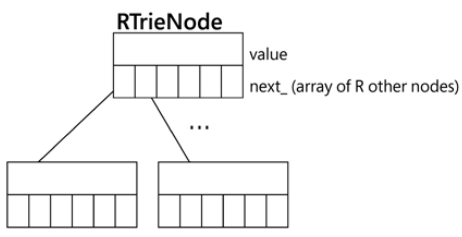
</div>

<figure style="text-align: center;">
    <figcaption style="font-size: 0.9em; color: black;">Figure 2.1: Generic structure for an R-Trie node</figcaption>
</figure>


And we could write a code block like the following one to represent it. In the following code, the attribute named `next_` contains a trailing underscore, just as a way to differentiate it from the built-in `next` function. We can argue that in this case, there's no collision, but if we needed to use the `next()` function within the `RTrieNode` class, that could be problematic (and those are usually hard-to-catch subtle errors):

In [5]:
from typing import List
from dataclasses import dataclass, field
R = 26
@dataclass
class RTrieNode:
    size = R
    value: int
    next_: List["RTrieNode"] = field(
        default_factory=lambda: [None] * R)
 
    def __post_init__(self):
        if len(self.next_) != self.size:
            raise ValueError(f"Invalid length provided for next list")


The preceding example contains several different combinations. First, we define an R-Trie with `R=26` to represent the characters in the English alphabet (this is not important to understand the code itself, but it gives more context). The idea is that if we want to store a word, we create a node for each letter, starting with the first one. When there's a link to the next character, we store it in the position of the `next_` array corresponding to that character, another node for that one, and so on.

Note the first attribute in the class: `size`. This one doesn't have an annotation, so it's a regular class attribute (shared for all node objects), and not something that belongs exclusively to the object. Alternatively, we could have defined this by setting `field(init=False)`, but this form is more compact. However, if we wanted to annotate the variable, but not consider it as part of `__init__`, then this syntax is the only viable alternative.

Then follow two other attributes, both of which have annotations, but with different considerations. The first one, `value`, is an integer, but it doesn't have a default argument, so when we create a new node, we must always provide a value as a first parameter. The second one is a mutable argument (a `list` of itself), and it does have a default factory: in this case a `lambda` function that will create a new list of size R, initialized with `None` on all slots. Note that if we had used `field(default_factory=list)` for this, we would still have constructed a new list for each object on creation, but this loses control over the length of that list. And finally, we wanted to validate that we don't create nodes that have a list of next nodes with the wrong length, so this is validated in the `__post_init__` method. Any attempt to create such a list will be prevented with a `ValueError` at initialization time.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Data classes provide a more compact way of writing classes, without the boilerplate of having to set all variables with the same name in the <code>__init__</code> method.
    </div>
</div>


When you have objects that don't do many complex validations or transformations on the data, consider this alternative. Keep in mind this last point. Annotations are great, but they don't enforce data conversion. This means that for example, if you declare an attribute that needs to be a `float`, or an `integer`, then you must do this conversion in the `__init__` method. Writing this as a data class won't do it, and it might hide subtle errors. This is for cases when validations aren't strictly required and type casts are possible. For example, it's perfectly fine to define an object that can be created from multiple other types, like converting a `float` from a numeric `string` (after all, this leverages Python's dynamic typing nature), provided this is correctly converted to the required data type within the `__init__` method.

Probably a good use case for data classes would be all those places when we need to use objects as data containers or wrappers, namely situations on which we used named tuples or simple namespaces. Consider data classes as another alternative to named tuples or namespaces when you're evaluating options in your code.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Iterable objects
</div>

In Python, we have objects that can be iterated by default. For example, lists, tuples, sets, and dictionaries can not only hold data in the structure we want, but also be iterated over a `for` loop to get those values repeatedly.

However, the built-in `iterable` objects are not the only kind that we can have in a `for` loop. We could also create our own `iterable`, with the logic we define for iteration.

In order to achieve this, we rely, once again, on magic methods.

Iteration works in Python by its own protocol (namely the `iterator` protocol). When you try to iterate an object in the form `for e in myobject:...`, what Python checks at a very high level are the following two things, in order:

- If the object contains one of the iterator methods— `__next__` or `__iter__`
- If the object is a sequence and has `__len__` and `__getitem__`

Therefore, as a fallback mechanism, sequences can be iterated, and so there are two ways of customizing our objects to be able to work on `for` loops.

<div style="font-size: 150%; font-weight: bold; margin-top: 20px; color: black;">
    Creating iterable objects
</div>

When we try to iterate an object, Python will call the `iter()` function over it. One of the first things this function checks for is the presence of the `__iter__` method on that object, which, if present, will be executed.

The following code creates an object that allows iterating over a range of dates, producing one day at a time on every round of the loop:

In [2]:
from datetime import timedelta
class DateRangeIterable:
    """An iterable that contains its own iterator object."""
    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
        self._present_day = start_date
    def __iter__(self):
        return self
    def __next__(self):
        if self._present_day >= self.end_date:
            raise StopIteration()
        today = self._present_day
        self._present_day += timedelta(days=1)
        return today


This object is designed to be created with a pair of dates, and when iterated, it will produce each day in the interval of specified dates, which is shown in the following code:

In [3]:
from datetime import date

In [9]:
for day in DateRangeIterable(date(2018, 1, 1), date(2018, 1, 5)):
     print(day)

2018-01-01
2018-01-02
2018-01-03
2018-01-04


Here, the `for` loop is starting a new iteration over our object. At this point, Python will call the `iter()` function on it, which, in turn, will call the `__iter__` magic method. On this method, it is defined to return `self`, indicating that the object is an `iterable` itself, so at that point every step of the loop will call the `next()` function on that object, which delegates to the `__next__` method. In this method, we decide how to produce the elements and return one at a time. When there is nothing else to produce, we have to signal this to Python by raising the `StopIteration` exception.

This means that what is actually happening is similar to Python calling `next()` every time on our object until there is a `StopIteration` exception, on which it knows it has to stop the `for` loop:

In [6]:
r = DateRangeIterable(date(2018, 1, 1), date(2018, 1, 5))

In [7]:
next(r)

datetime.date(2018, 1, 1)

In [8]:
next(r)

datetime.date(2018, 1, 2)

In [9]:
next(r)

datetime.date(2018, 1, 3)

In [10]:
next(r)

datetime.date(2018, 1, 4)

In [11]:
next(r)

StopIteration: 

This example works, but it has a small problem—once exhausted, the `iterable` will continue to be empty, hence raising `StopIteration`. This means that if we use this on two or more consecutive `for` loops, only the first one will work, while the second one will be empty:

In [12]:
r1 = DateRangeIterable(date(2018, 1, 1), date(2018, 1, 5))

In [13]:
", ".join(map(str, r1))

'2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04'

In [14]:
max(r1)

ValueError: max() arg is an empty sequence

This is because of the way the iteration protocol works—an `iterable` constructs an iterator, and this one is the one being iterated over. In our example, `__iter__` just returned `self`, but we can make it create a new iterator every time it is called. One way of fixing this would be to create new instances of `DateRangeIterable`, which is not a terrible issue, but we can make `__iter__` use a generator (which are iterator objects), which is being created every time:

In [10]:
class DateRangeContainerIterable:
    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
    def __iter__(self):
        current_day = self.start_date
        while current_day < self.end_date:
            yield current_day
            current_day += timedelta(days=1)


And this time it works:

In [11]:
r1 = DateRangeContainerIterable(date(2018, 1, 1), date(2018, 1, 5))

In [12]:
", ".join(map(str, r1))

'2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04'

In [14]:
max(r1)

datetime.date(2018, 1, 4)

The difference is that each `for` loop is calling `__iter__` again, and each one of those is creating the generator again.

This is called a container `iterable`.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> In general, it is a good idea to work with container iterables when dealing with generators.
    </div>
</div>


Details on generators will be explained in more detail in <i style="font-family: 'Times New Roman'; font-size: 16px;"> Chapter 7, Generators, Iterators, and Asynchronous Programming.</i>

<div style="font-size: 150%; font-weight: bold; margin-top: 20px; color: black;">
    Creating sequences
</div>

Maybe our object does not define the `__iter__()` method, but we still want to be able to iterate over it. If `__iter__` is not defined on the object, the `iter()` function will look for the presence of `__getitem__`, and if this is not found, it will raise `TypeError`.

A sequence is an object that implements `__len__` and `__getitem__` and expects to be able to get the elements it contains, one at a time, in order, starting at zero as the first index. This means that you should be careful in the logic so that you correctly implement `__getitem__` to expect this type of index, or the iteration will not work.

The example from the previous section had the advantage that it uses less memory. This means that it is only holding one date at a time and knows how to produce the days one by one. However, it has the drawback that if we want to get the nth element, we have no way to do so but iterate n-times until we reach it. This is a typical trade-off in computer science between memory and CPU usage.

The implementation with an `iterable` will use less memory, but it takes up to <i style="font-family: 'Times New Roman'; font-size: 16px;"> O(n) </i> to get an element, whereas implementing a sequence will use more memory (because we have to hold everything at once), but supports indexing in constant time,<i style="font-family: 'Times New Roman'; font-size: 16px;"> O(1) </i>.

The preceding notation (for example, <i style="font-family: 'Times New Roman'; font-size: 16px;"> O(n) </i>) is called asymptotic notation (or "big-O" notation) and it describes the order of complexity of the algorithm. At a very high level, this means how many operations the algorithm needs to perform as a function of the size of the input <i style="font-family: 'Times New Roman'; font-size: 16px;"> (n) </i>. For more information on this, you can check out (ALGO01) listed at the end of the chapter, which contains a detailed study of asymptotic notation.

This is what the new implementation might look like:

In [ ]:
class DateRangeSequence:
    def __init__(self, start_date, end_date):
        self.start_date = start_date
        self.end_date = end_date
        self._range = self._create_range()
    def _create_range(self):
        days = []
        current_day = self.start_date
        while current_day < self.end_date:
            days.append(current_day)
            current_day += timedelta(days=1)
        return days
    def __getitem__(self, day_no):
        return self._range[day_no]
    def __len__(self):
        return len(self._range)


Here is how the object behaves:

In [ ]:
s1 = DateRangeSequence(date(2018, 1, 1), date(2018, 1, 5))

In [ ]:
for day in s1:
    print(day)

In [ ]:
s1[0]

In [ ]:
s1[3]

In [ ]:
s1[-1]

In the preceding code, we can see that negative indices also work. This is because the `DateRangeSequence` object delegates all of the operations to its wrapped object (a `list`), which is the best way to maintain compatibility and a consistent behavior.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Evaluate the trade-off between memory and CPU usage when deciding which one of the two possible implementations to use. In general, the iteration is preferable (and generators even more), but keep in mind the requirements of every case.
    </div>
</div>


<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Container objects
</div>

Containers are objects that implement a `__contains__` method (that usually returns a `Boolean` value). This method is called in the presence of the `in` keyword of Python.

Something like the following:

In [ ]:
element in container


When used in Python, becomes this:

In [ ]:
container.__contains__(element)


You can imagine how much more readable (and Pythonic!) the code can be when this method is properly implemented.

Let's say we have to mark some points on a map of a game that has two-dimensional coordinates. We might expect to find a function like the following:

In [ ]:
def mark_coordinate(grid, coord):
    if 0 <= coord.x < grid.width and 0 <= coord.y < grid.height:
        grid[coord] = MARKED


Now, the part that checks the condition of the first `if` statement seems convoluted; it doesn't reveal the intention of the code, it's not expressive, and worst of all it calls for code duplication (every part of the code where we need to check the boundaries before proceeding will have to repeat that `if` statement).

What if the map itself (called `grid` on the code) could answer this question? Even better, what if the map could delegate this action to an even smaller (and hence more cohesive) object?

We could solve this problem in a more elegant way with object-oriented design and with the help of a magic method. In this case, we can create a new abstraction to represent the limits of the grid, which can be made an object in itself. <i style="font-family: 'Times New Roman'; font-size: 16px;"> Figure 2.2 </i> helps illustrate the point:

<div style="text-align: center;">
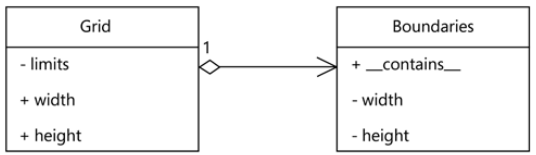
</div>

<figure style="text-align: center;">
    <figcaption style="font-size: 0.9em; color: black;">Figure 2.2: An example using composition, distributing responsibilities in different classes, and using the container magic method</figcaption>
</figure>


Parenthetically, I'll mention that it's true that in general, class names refer to nouns, and they're usually singular. So, it might sound strange to have a class named `Boundaries`, but if we think about it, perhaps for this particular case, it makes sense to say that we have an object representing all the boundaries of a grid, especially because of the way it's being used (in this case, we're using it to validate if a particular coordinate is within those boundaries).

With this design, we can ask the `map` if it contains a coordinate, and the `map` itself can have information about its limit and pass the query down to its internal collaborator:

In [ ]:
class Boundaries:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    def __contains__(self, coord):
        x, y = coord
        return 0 <= x < self.width and 0 <= y < self.height
class Grid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.limits = Boundaries(width, height)
    def __contains__(self, coord):
        return coord in self.limits


This code alone is a much better implementation. First, it is doing a simple composition and it's using delegation to solve the problem. Both objects are really cohesive, having the minimal possible logic; the methods are short, and the logic speaks for itself—`coord in self.limits` is pretty much a declaration of the problem to solve, expressing the intention of the code.

From the outside, we can also see the benefits. It's almost as if Python is solving the problem for us:

In [ ]:
def mark_coordinate(grid, coord):
    if coord in grid:
        grid[coord] = MARKED


<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Dynamic attributes for objects
</div>

It is possible to control the way attributes are obtained from objects by means of the `__getattr__` magic method. When we call something like `<myobject>.<myattribute>`, Python will look for `<myattribute>` in the dictionary of the object, calling `__getattribute__` on it. If this is not found (namely, the object does not have the attribute we are looking for), then the extra method, `__getattr__`, is called, passing the name of the attribute (myattribute) as a parameter. 

By receiving this value, we can control the way things should be returned to our objects. We can even create new attributes, and so on.

In the following listing, the `__getattr__` method is demonstrated:

In [15]:
class DynamicAttributes:
    def __init__(self, attribute):
        self.attribute = attribute
    def __getattr__(self, attr):
        if attr.startswith("fallback_"):
            name = attr.replace("fallback_", "")
            return f"[fallback resolved] {name}"
        raise AttributeError(
            f"{self.__class__.__name__} has no attribute {attr}"
        )


Here are some calls to an object of this class:

In [17]:
dyn = DynamicAttributes("value")
dyn.attribute

'value'

In [18]:
dyn.fallback_test

'[fallback resolved] test'

In [19]:
dyn.__dict__["fallback_new"] = "new value"
dyn.fallback_new

'new value'

In [20]:
getattr(dyn, "something", "default")

'default'

The first call is straightforward—we just request an attribute that the object has and get its value as a result. The second is where this method takes action because the object does not have anything called `fallback_test`, so `__getattr__` will run with that value. Inside that method, we placed the code that returns a string, and what we get is the result of that transformation.

The third example is interesting because a new attribute named `fallback_new` is created (actually, this call would be the same as running `dyn.fallback_new = "new value"`), so when we request that attribute, notice that the logic we put in `__getattr__` does not apply, simply because that code is never called.

Now, the last example is the most interesting one. There is a subtle detail here that makes a huge difference. Take another look at the code in the `__getattr__` method. Notice the exception it raises when the value is not retrievable, `AttributeError`. This is not only for consistency (as well as the message in the exception), but also required by the built-in `getattr()` function. Had this exception been any other, it would raise, and the default value would not be returned.

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Be careful when implementing a method so dynamic as <code>__getattr__</code>, and use it with caution. When implementing <code>__getattr__</code>, raise <code>AttributeError</code>.
    </div>
</div>


The `__getattr__` magic method is useful in many situations. It can be used to create a proxy to another object. For example, if you're creating a wrapper object on top of another one by means of composition, and you want to delegate most of the methods to the wrapped object, instead of copying and defining all of those methods, you can implement `__getattr__` that will internally call the same method on the wrapped object.

Another example is when you know you need attributes that are dynamically computed. I've used it on a past project working with `GraphQL` (_https://graphql.org/_) with `Graphene` (_https://graphene-python.org/_). The way the library worked was by using resolver methods. Basically, every method named `resolve_X` was used when property `X` was requested. Since there were already domain objects that could resolve each property `X` in the class of the `Graphene` object, `__getattr__` was implemented to know where to get each property from, without having to write a massive boilerplate code.

Use the `__getattr__` magic method when you see an opportunity to avoid lots of duplicated code and boilerplate, but don't abuse this method, as it'll render the code harder to understand and reason about. Keep in mind that having attributes that aren't explicitly declared and just appear dynamically will make the code harder to understand. When using this method, you're always weighing code compactness versus maintainability.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Callable objects
</div>

It is possible (and often convenient) to define objects that can act as functions. One of the most common applications for this is to create better decorators, but it's not limited to that.

The magic method `__call__` will be called when we try to execute our object as if it were a regular function. Every argument passed to it will be passed along to the `__call__` method.

The main advantage of implementing functions this way, through objects, is that objects have states, so we can save and maintain information across calls. This means that using a `callable` object might be a more convenient way of implementing functions if we need to maintain an internal state across different calls. Examples of this can be functions we would like to implement with memoization, or internal caches.

When we have an object, a statement like this, `object(*args, **kwargs)`, is translated in Python to `object.__call__(*args, **kwargs)`.

This method is useful when we want to create callable objects that will work as parametrized functions, or in some cases, functions with memory.

The following listing uses this method to construct an object that, when called with a parameter, returns the number of times it has been called with the very same value:

In [ ]:
from collections import defaultdict
class CallCount:
    def __init__(self):
        self._counts = defaultdict(int)
    def __call__(self, argument):
        self._counts[argument] += 1
        return self._counts[argument]


Some examples of this class in action are as follows:

In [ ]:
cc = CallCount()
cc(1)

In [ ]:
cc(2)

In [ ]:
cc(1)

In [ ]:
cc(1)

In [ ]:
cc("something")

In [ ]:
callable(cc)

Later in this book, we will find out that this method comes in handy when creating decorators.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Summary of magic methods
</div>

We can summarize the concepts we described in the previous sections in the form of a cheat sheet like the one presented as follows. For each action in Python, the magic method involved is presented, along with the concept that it represents:

<table style="width:100%; border-collapse: collapse; text-align: center;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Statement</th>
    <th style="border: 1px solid black; padding: 8px;">Magic method</th>
    <th style="border: 1px solid black; padding: 8px;">Behavior</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">
      obj[key]<br>
      obj[i:j]<br>
      obj[i:j:k]
    </td>
    <td style="border: 1px solid black; padding: 8px;">__getitem__(key)</td>
    <td style="border: 1px solid black; padding: 8px;">Subscriptable object</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">with obj: ...</td>
    <td style="border: 1px solid black; padding: 8px;">__enter__ / __exit__</td>
    <td style="border: 1px solid black; padding: 8px;">Context manager</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">
        for i in obj: 
        ...</td>
    <td style="border: 1px solid black; padding: 8px;">
      __iter__ / __next__<br>
      __len__ / __getitem__
    </td>
    <td style="border: 1px solid black; padding: 8px;">
      Iterable object<br>
      Sequence
    </td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">obj.&lt;attribute&gt;</td>
    <td style="border: 1px solid black; padding: 8px;">__getattr__</td>
    <td style="border: 1px solid black; padding: 8px;">Dynamic attribute retrieval</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">obj(*args, **kwargs)</td>
    <td style="border: 1px solid black; padding: 8px;">__call__(*args, **kwargs)</td>
    <td style="border: 1px solid black; padding: 8px;">Callable object</td>
  </tr>
</table>

<figure style="text-align: center;">
    <figcaption style="font-size: 0.9em; color: black;">Table 2.1: Magic methods and their behavior in Python</figcaption>
</figure>


The best way to implement these methods correctly (and to know the set of methods that need to be implemented together) is to declare our class to implement the corresponding class following the abstract base classes defined in the `collections.abc` module (_https://docs.python.org/3/library/collections.abc.html#collections-abstract-base-classes_). These interfaces provide the methods that need to be implemented, so it'll make it easier for you to define the class correctly, and it'll also take care of creating the type correctly (something that works well when the `isinstance()` function is called on your object).

We have seen the main features of Python with respect to its peculiar syntax. With the features we have learned (context managers, callable objects, creating our own sequences, and suchlike), we are now able to write code that will blend well with Python's reserved words (for example, we can use the with statements `with` our own context managers, or the `in` operator with a container of our own.)

With practice and experience, you'll become more fluent with these features of Python, until it becomes second nature for you to wrap the logic you're writing behind abstractions with nice and small interfaces. Give it enough time, and the reverse effect will take place: Python will start programming you. That is, you'll naturally think of having small, clean interfaces in your programs, so even when you're creating software in a different language, you'll try to use these concepts. For example, if you find yourself programming in, let's say, Java or C (or even Bash), you might identify a scenario where a context manager might be useful. Now the language itself might not support this out of the box, but that might not stop you from writing your own abstraction that provides similar guarantees. And that's a good thing. It means you have internalized good concepts beyond a specific language, and you can apply them in different situations.

All programming languages have their caveats, and Python is no exception, so in order to have a more complete understanding of Python, we'll review some of them in the next section.

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    Caveats in Python
</div>

Besides understanding the main features of the language, being able to write idiomatic code is also about being aware of the potential problems of some idioms, and how to avoid them. In this section, we will explore common issues that might cause you long debugging sessions if they catch you off guard.

Most of the points discussed in this section are things to avoid entirely, and I will dare to say that there is almost no possible scenario that justifies the presence of the anti-pattern (or idiom, in this case). Therefore, if you find this on the code base you are working on, feel free to refactor it in the way that is suggested. If you find these traits while doing a code review, this is a clear indication that something needs to change.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Mutable default arguments
</div>

Simply put, don't use mutable objects as the default arguments of functions. If you use mutable objects as default arguments, you will get results that are not the expected ones.

Consider the following erroneous function definition:

In [21]:
def wrong_user_display(user_metadata: dict = {"name": "John", "age": 30}):
    name = user_metadata.pop("name")
    age = user_metadata.pop("age")
    return f"{name} ({age})"


This has two problems, actually. Besides the default mutable argument, the body of the function is mutating a mutable object, and hence creating a side effect. But the main problem is the default argument for `user_metadata`.

This will actually only work the first time it is called without arguments. For the second time, we call it without explicitly passing something to `user_metadata`. It will fail with a `KeyError`, like so:

In [22]:
wrong_user_display()

'John (30)'

In [24]:
wrong_user_display({"name": "Jane", "age": 25})

'Jane (25)'

In [23]:
wrong_user_display()

KeyError: 'name'

The explanation is simple—by assigning the dictionary with the default data to `user_metadata` on the definition of the function, this dictionary is actually created once and the `user_metadata` variable points to it. When the Python interpreter parses the file, it'll read the function, and find a statement in the signature that creates the dictionary and assigns it to the parameter. From that point on, the dictionary is created only once, and it's the same for the entire life of the program.

Then, the body of the function modifies this object, which remains alive in memory so long as the program is running. When we pass a value to it, this will take the place of the default argument we just created. When we don't want this object, it is called again, and it has been modified since the previous run; the next time we run it, will not contain the keys since they were removed on the previous call.

The fix is also simple—we need to use `None` as a default sentinel value and assign the default on the body of the function. Because each function has its own scope and life cycle, `user_metadata` will be assigned to the dictionary every time `None` appears:

In [ ]:
def user_display(user_metadata: dict = None):
    user_metadata = user_metadata or {"name": "John", "age": 30}
    name = user_metadata.pop("name")
    age = user_metadata.pop("age")
    return f"{name} ({age})"


Let's conclude the section by understanding the quirks of extending built-in types.

<div style="font-size: 200%; font-weight: bold; margin-top: 35px; color: black;">
    Extending built-in types
</div>

The correct way of extending built-in types such as lists, strings, and dictionaries is by means of the `collections` module.

If you create a class that directly extends `dict`, for example, you will obtain results that are probably not what you are expecting. The reason for this is that in CPython (a C optimization), the methods of the class don't call each other (as they should), so if you override one of them, this will not be reflected by the rest, resulting in unexpected outcomes. For example, you might want to override `__getitem__`, and then when you iterate the object with a `for` loop, you will notice that the logic you have put on that method is not applied.

This is all solved by using `collections.UserDict`, for example, which provides a transparent interface to actual dictionaries, and is more robust.

Let's say we want a list that was originally created from numbers to convert the values to strings, adding a prefix. The first approach might look like it solves the problem, but it is erroneous:

In [ ]:
class BadList(list):
    def __getitem__(self, index):
        value = super().__getitem__(index)
        if index % 2 == 0:
            prefix = "even"
        else:
            prefix = "odd"
        return f"[{prefix}] {value}"


At first sight, it looks like the object behaves as we want it to. But then, if we try to iterate it (after all, it is a `list`), we find that we don't get what we wanted:

In [ ]:
bl = BadList((0, 1, 2, 3, 4, 5))
bl[0]

In [ ]:
bl[1]

In [ ]:
"".join(bl)

The `join` function will try to iterate (run a `for` loop over) the `list` but expects values of the `string` type. We would expect this to work because we modified the `__getitem__` method so that it always returns a `string`. However, based on the result, we can conclude that our modified version of `__getitem__` is not being called.

This issue is actually an implementation detail of CPython, while in other platforms such as PyPy this doesn't happen (see the differences between PyPy and CPython in the references at the end of this chapter).

Regardless of this, we should write code that is portable and compatible with all implementations, so we will fix it by extending not from `list`, but `UserList`:

In [ ]:
from collections import UserList
class GoodList(UserList):
    def __getitem__(self, index):
        value = super().__getitem__(index)
        if index % 2 == 0:
            prefix = "even"
        else:
            prefix = "odd"
        return f"[{prefix}] {value}"


And now things look much better:

In [ ]:
gl = GoodList((0, 1, 2))

In [ ]:
gl[0]

In [ ]:
gl[1]

In [ ]:
"; ".join(gl)

<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Don't extend directly from <code>dict</code>; use <code>collections.UserDict</code> instead. For lists, use <code>collections.UserList</code>, and for strings, use <code>collections.UserString</code>.
    </div>
</div>


At this point, we know all the main concepts of Python. Not only how to write idiomatic code that blends well with Python itself, but also to avoid certain pitfalls. The next section is complementary.

Before finishing the chapter, I wanted to give a quick introduction to asynchronous programming, because while it is not strictly related to clean code per se, asynchronous code has become more and more popular, following up with the idea that, in order to work effectively with code, we must be able to read it and understand it, because being able to read asynchronous code is important.

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    A brief introduction to asynchronous code
</div>

Asynchronous programming is not related to clean code. Therefore, the features of Python described in this section won't make the code base easier to maintain. This section introduces the syntax in Python to work with coroutines, because it might be of use for the reader, and examples with coroutines might appear later in the book.

The idea behind asynchronous programming is to have parts in our code that are able to suspend so that other parts of our code can run. Typically, when we are running I/O operations, we would very much like to keep that code running, and use the CPU on something else during that time.

This changes the programming model. Instead of us making calls synchronously, we would write our code in a way that is being called by an event loop, which is in charge of scheduling the coroutines for running all of them in the same process and thread.

The idea is that we create a series of coroutines, and they're added to the event loop. When the event loop starts, it'll pick among the coroutines it has, and schedule them to run. At some point, when one of our coroutines needs to do an I/O operation, we can trigger it and signal the event loop back to take control again, and then schedule another coroutine whilst this operation was kept running. At some point, the event loop will resume our coroutine from the last point it got stopped at, and will continue from there. Keep in mind that the advantage of asynchronous programming is to not block on I/O operations. This means the code can jump to something else while an I/O operation is in place and then come back at it, but it doesn't mean that there are multiple processes running simultaneously. The execution model is still single-threaded.

In order to achieve this in Python, there were (and still are) lots of frameworks available. But in older versions of Python, there wasn't a specific syntax that allowed this, so the way the frameworks worked was a bit complicated, or non-obvious at first glance. Starting with Python 3.5, specific syntax for declaring coroutines was added to the language, and that changed the way we write asynchronous code in Python. Slightly prior to that, a default event loop module, `asyncio`, was introduced in the standard library. With these two milestones of Python, making asynchronous programming is much better.

While this section uses `asyncio` as the module for asynchronous processing, this is not the only one. You can write asynchronous code using any library (there are plenty of them available outside the standard library, such as `trio` (_https://github.com/python-trio/trio_) and `curio` (_https://github.com/dabeaz/curio_) to name just a couple). The syntax that Python provides for writing coroutines can be considered an API. As long as the library you choose complies with that API, you should be able to use it, without having to change how your coroutines were declared.

The syntactic differences compared with asynchronous programming are that coroutines are like functions, but they're defined with `async def` before their name. When inside a coroutine and we want to call another one (which can be ours, or defined in a third-party library), we would typically use the `await` keyword before its invocation. When `await` is called, this signals the event loop to take back control. At this point, the event loop will resume its execution, and the coroutine will be left there waiting for its non-blocking operation to continue, and in the meantime, another part of the code will run (another coroutine will be called by the event loop). At some point, the event loop will call our original coroutine again, and this one will resume from the point where it left off (right after the line with the `await` statement).

A typical coroutine we might define in our code has the following structure:

In [ ]:
async def mycoro(*args, **kwargs):
    # … logic
    await third_party.coroutine(…)
    # … more of our logic


As mentioned before, there's new syntax for defining coroutines. One difference that this syntax introduces is that as opposed to regular functions, when we call this definition, it will not run the code within it. Instead, it will create a coroutine object. This object will be included in the event loop, and at some point, must be awaited (otherwise the code inside the definition will never run):

In [ ]:
result = await mycoro(…)   #  doing result = mycoro() would be erroneous


<div style="border: 1px solid #ccc; padding: 10px; background-color: #f9f9f9; display: flex; align-items: center;">
    <div style="font-size: 24px; color: #555; padding-right: 10px;">💡</div>
    <div style="font-size: 14px;">
        <strong>Tip:</strong> Don't forget to await your coroutines, or their code will never be run. Pay attention to the warnings given by <code>asyncio</code>.
    </div>
</div>


As mentioned, there are several libraries for asynchronous programming in Python, with event loops that can run coroutines like the preceding one defined. In particular, for `asyncio`, there's a built-in function to run a coroutine until its completion:

In [ ]:
import asyncio
asyncio.run(mycoro(…))


The details of how coroutines work in Python are beyond the scope of this book, but this introduction should get the reader more familiar with the syntax. That said, coroutines are technically implemented on top of generators, which we will explore in detail in <i style="font-family: 'Times New Roman'; font-size: 16px;"> Chapter 7, Generators, Iterators, and Asynchronous Programming. </i>

<div style="font-size: 250%; font-weight: bold; margin-top: 40px; color: black;">
    Summary
</div>

In this chapter, we have explored the main features of Python, with the goal of understanding its most distinctive features, those that make Python a peculiar language compared to the rest. Along this path, we have explored different methods of Python, protocols, and their internal mechanics.

As opposed to the previous chapter, this one is more Python-focused. A key takeaway of the topics of this book is that clean code goes beyond following the formatting rules (which, of course, are essential to a good code base). They are a necessary condition, but not sufficient. Over the next few chapters, we will see ideas and principles that relate more to the code, with the goal of achieving a better design and implementation of our software solution.

With the concepts and the ideas of this chapter, we explored the core of Python: its protocols and magic methods. It should be clear by now that the best way of having Pythonic, idiomatic code is not only by following the formatting conventions, but also by taking full advantage of all the features Python has to offer. This means that you can write more maintainable code by using a particular magic method, a context manager, or writing more concise statements by using comprehensions and assignment expressions.

We also got acquainted with asynchronous programming, and now we should feel comfortable reading asynchronous code in Python. This is important because asynchronous programming is becoming increasingly popular, and it'll be useful for future topics, explored later in the book.

In the next chapter, we will put these concepts into action, relating general concepts of software engineering with the way they can be written in Python.

<div style="font-size: 260%; font-weight: bold; margin-top: 40px; color: black;">
    References
</div>

The reader will find more information about some of the topics that we have covered in this chapter in the following references. The decision of how indices work in Python is based on (EWD831), which analyzes several alternatives for ranges in math and programming languages:

- <i style="font-family: 'Times New Roman'; font-size: 16px;"> EWD831: Why numbering should start at zero (https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html_) </i>
- <i style="font-family: 'Times New Roman'; font-size: 16px;"> PEP-343: The "with" statement (https://www.python.org/dev/peps/pep-0343/) </i>
- <i style="font-family: 'Times New Roman'; font-size: 16px;"> CC08: The book written by Robert C. Martin entitled Clean Code: A Handbook of Agile Software Craftsmanship </i>
- <i style="font-family: 'Times New Roman'; font-size: 16px;"> The iter() function: https://docs.python.org/3/library/functions.html#iter </i>
- <i style="font-family: 'Times New Roman'; font-size: 16px;"> Differences between PyPy and CPython: https://pypy.readthedocs.io/en/latest/cpython_differences.html#subclasses-of-built-in-types </i>
- <i style="font-family: 'Times New Roman'; font-size: 16px;"> The Art of Enbugging: http://media.pragprog.com/articles/jan_03_enbug.pdf </i>
- <i style="font-family: 'Times New Roman'; font-size: 16px;"> ALGO01: The book written by Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein entitled Introduction to Algorithms, 3rd Edition (The MIT Press) </i>